In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
 # Loading the Fashion Mnist Dataset
mnist_fashion = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist_fashion.load_data() 

In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
len(train_labels), len(test_labels)

(60000, 10000)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_labels, test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [7]:
#Normalizing the input images

train_images = train_images / 255.0  

test_images = test_images / 255.0

In [8]:
#Build the model

model = keras.Sequential([
    keras.layers.Reshape(input_shape=(28*28,), target_shape=(28,28,1)),
    keras.layers.Conv2D(30, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(60, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
#Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6939 - accuracy: 0.7702 - val_loss: 1.6093 - val_accuracy: 0.8531
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6069 - accuracy: 0.8549 - val_loss: 1.6071 - val_accuracy: 0.8531
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5910 - accuracy: 0.8697 - val_loss: 1.5810 - val_accuracy: 0.8804
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5780 - accuracy: 0.8833 - val_loss: 1.5725 - val_accuracy: 0.8895
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5703 - accuracy: 0.8913 - val_loss: 1.5749 - val_accuracy: 0.8858
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5663 - accuracy: 0.8949 - val_loss: 1.5650 - val_accuracy: 0.8954
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5598 - accuracy: 0.9012 - val_loss: 1.5681 - val_accuracy:

313/313 - 1s - loss: 1.5553 - accuracy: 0.9054

Test accuracy: 90.53999781608582


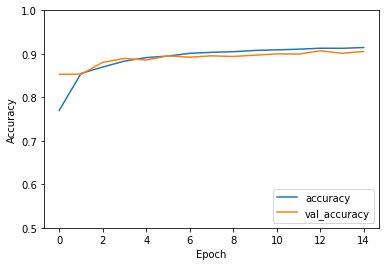

In [10]:
#Evaluate the Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc*100)

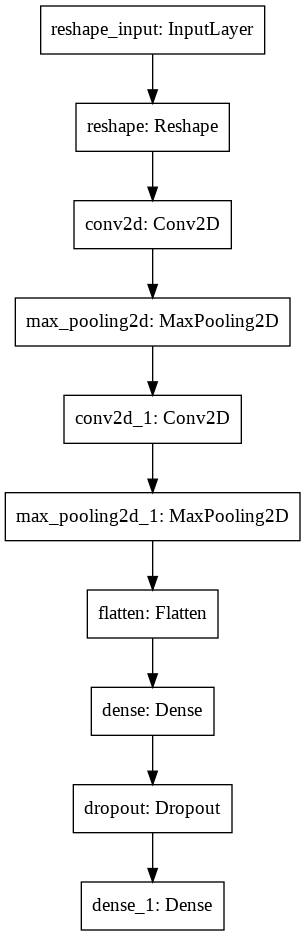

In [11]:
keras.utils.plot_model(model)